<a href="https://colab.research.google.com/github/SurajLahariya/DS_learning/blob/main/Assignment_14_(Desicion_tree)_Fraud_Check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
url = 'https://raw.githubusercontent.com/SurajLahariya/DS_learning/main/Fraud_check.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [15]:
df.describe(include=['O'])

,Undergrad,Marital.Status,Urban
count,600,600,600
unique,2,3,2
top,YES,Single,YES
freq,312,217,302


In [16]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

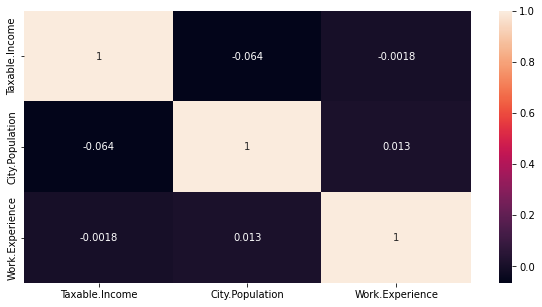

In [17]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Undergrad'] = label_encoder.fit_transform(df['Undergrad'])
df['Marital.Status'] = label_encoder.fit_transform(df['Marital.Status'])
df['Urban'] = label_encoder.fit_transform(df['Urban'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital.Status   600 non-null    int64
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int64
dtypes: int64(6)
memory usage: 28.2 KB


In [19]:
df.rename(columns = {'Marital.Status' : 'marital_status', 'Taxable.Income': 'Income', 'City.Population': 'Population',
                    'Work.Experience': 'work_exp'}, inplace= True)

In [20]:
df['status'] = df['Income'].apply(lambda Income: 'Risky' if Income <= 30000 else 'Good')

In [21]:
df.head(50)

,Undergrad,marital_status,Income,Population,work_exp,Urban,status
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
5,0,0,33329,116382,0,0,Good
6,0,0,83357,80890,8,1,Good
7,1,2,62774,131253,3,1,Good
8,0,2,83519,102481,12,1,Good
9,1,0,98152,155482,4,1,Good


In [22]:
df.drop(['Income'], axis=1, inplace=True)

In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['status'] = label_encoder.fit_transform(df['status'])

In [24]:
x=df.iloc[:,0:5]
y=df['status']

In [25]:
x.head()

,Undergrad,marital_status,Population,work_exp,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0


In [26]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: status, dtype: int64

In [27]:
y.value_counts()

0    476
1    124
Name: status, dtype: int64

In [28]:
#Splitting data into training and test data set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=40)

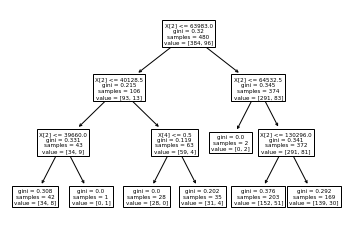

In [29]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(x_train, y_train)

#Plot the Decision tree
tree.plot_tree(model);

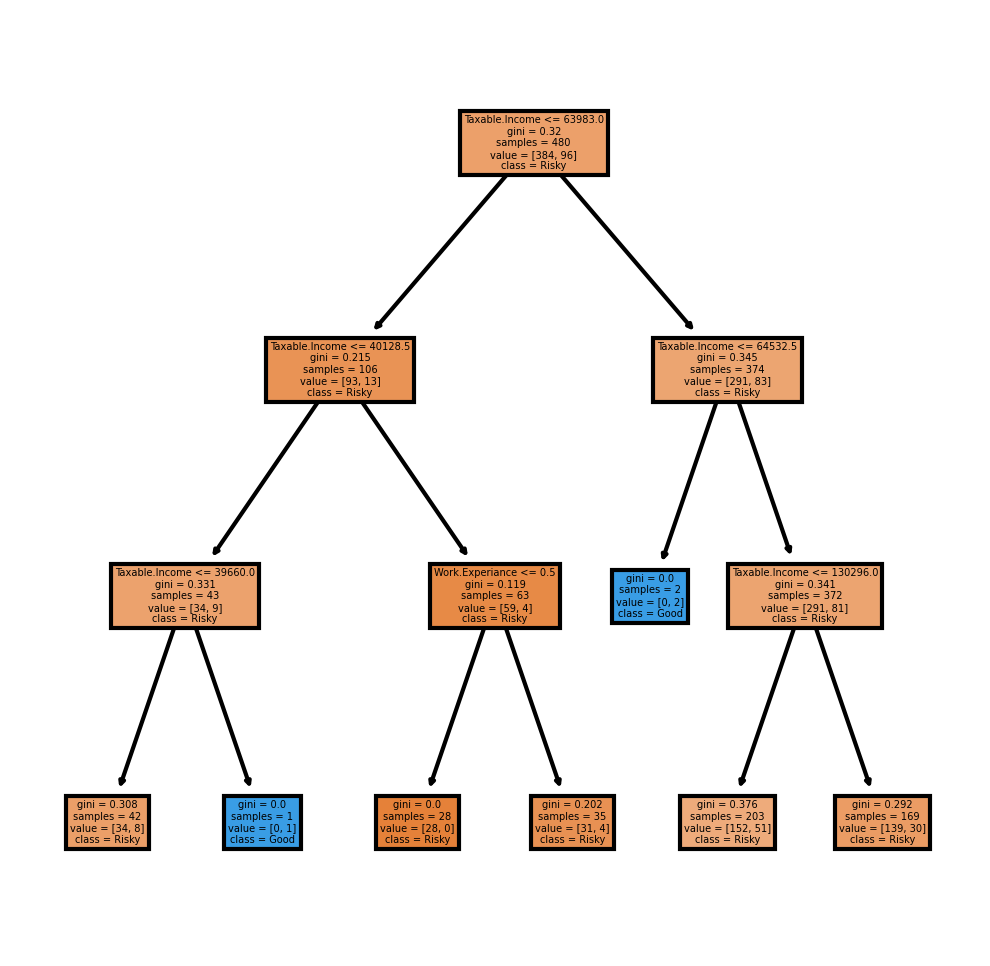

In [30]:
fn = ['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population', 'Work.Experiance', 'Urban']
cn = ['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [31]:
preds = model.predict(c)
pd.Series(preds).value_counts()

0    119
1      1
dtype: int64

In [32]:
pd.crosstab(y_test,preds)

col_0,0,1
status,,
0,91,1
1,28,0


Classification Report                precision    recall  f1-score   support

           0       0.76      0.99      0.86        92
           1       0.00      0.00      0.00        28

    accuracy                           0.76       120
   macro avg       0.38      0.49      0.43       120
weighted avg       0.59      0.76      0.66       120



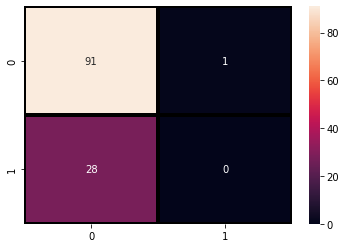

In [33]:
sns.heatmap(confusion_matrix(y_test, preds),annot=True,fmt = "d",linecolor="k",linewidths=3)
print('Classification Report ',classification_report(y_test,preds))

In [34]:

train_accuracy = []
test_accuracy = []

for max_depth in range (1,11):
  model =DecisionTreeClassifier(criterion = 'entropy',max_depth = max_depth, random_state = 20)
  model.fit(x_train,y_train)
  train_accuracy.append(model.score(x_train, y_train))
  test_accuracy.append(model.score(x_test, y_test))
     

In [35]:
Accuracy = pd.DataFrame({'max_depth':range(1,11),'train_accuracy':train_accuracy,'test_accuracy':test_accuracy})
Accuracy

,max_depth,train_accuracy,test_accuracy
0,1,0.800000,0.766667
1,2,0.804167,0.766667
2,3,0.804167,0.766667
3,4,0.810417,0.758333
4,5,0.822917,0.775000
5,6,0.831250,0.758333
6,7,0.841667,0.750000
7,8,0.854167,0.741667
8,9,0.866667,0.733333
9,10,0.875000,0.741667


In [37]:
final_model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5, random_state = 20)
final_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=20)

In [39]:
y_hat = final_model.predict(x_test)

Classification Report                precision    recall  f1-score   support

           0       0.78      0.99      0.87        92
           1       0.67      0.07      0.13        28

    accuracy                           0.78       120
   macro avg       0.72      0.53      0.50       120
weighted avg       0.75      0.78      0.70       120



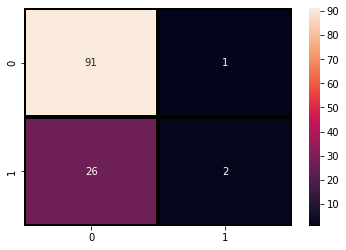

In [41]:
sns.heatmap(confusion_matrix(y_test, y_hat),annot=True,fmt = "d",linecolor="k",linewidths=3)
print('Classification Report ',classification_report(y_test,y_hat))

In [43]:
print(confusion_matrix(y_test,y_hat))

[[91  1]
 [26  2]]


In [45]:
accuracy_score(y_test,y_hat)

0.775